In [2]:
import pandas as pd
from pathlib import Path

In [3]:
# Load the first part of the file into df1
df1 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  nrows=54276)  # Read only the first 54276 rows


In [4]:
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce').astype('Int64')  # Use Int64 to handle NaNs

In [5]:
df1 = df1[(df1['Year'] >= 2010) & (df1['Year'] <= 2017)]
df1.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
20,20,Afghanistan,AFG,2010,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
21,21,Afghanistan,AFG,2011,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
22,22,Afghanistan,AFG,2012,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372
23,23,Afghanistan,AFG,2013,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433
24,24,Afghanistan,AFG,2014,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447


In [6]:
df1.to_csv('df1output.csv', index=False)

In [7]:
start_row = 54277
end_row = 102084
nrows = end_row - start_row + 1

# Read the specific range of rows from the CSV file
df2 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  skiprows=range(start_row),  # Skip rows before start_row
                  nrows=nrows)  

In [8]:
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')

In [9]:
# Filter for years 2010-2017
df2 = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2017)]
#Remove unneccesary columns
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [10]:
# Display the filtered DataFrame
df2.head()

,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
210,54487,Afghanistan,AFG,2010.0,9.875393,4053.953769,29186000.0
211,54488,Afghanistan,AFG,2011.0,9.721869,4051.719397,30117000.0
212,54489,Afghanistan,AFG,2012.0,9.570651,4051.013647,31161000.0
213,54490,Afghanistan,AFG,2013.0,9.447661,4050.870419,32270000.0
214,54491,Afghanistan,AFG,2014.0,9.346731,4047.328640,33371000.0


In [11]:
df2.to_csv('df2output.csv', index=False)

In [12]:
df1 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  nrows=54276, 
                  index_col=0)  # Skip the index column

# Load df2
start_row = 54277
end_row = 102084
nrows = end_row - start_row + 1

# Read the specific range of rows from the CSV file
df2 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  skiprows=range(start_row),  # Skip rows before start_row
                  nrows=nrows)    # Skip the index column

# Ensure 'Year' is in numeric format and filter for years 2010-2017
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')

df1 = df1[df1['Year'].between(2010, 2017)]
df2 = df2[df2['Year'].between(2010, 2017)]

# Drop unnecessary columns from df2 and rename for consistency
df2 = df2.drop(columns=['Population'])
df2 = df2.loc[:, ~df2.columns.str.contains('^54276')]
# Merge the datasets on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'], how='inner')

# Reset index and drop any duplicate columns
merged_df = merged_df.reset_index(drop=True)

# Save or inspect the merged DataFrame
merged_df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Afghanistan,AFG,2010.0,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062,9.875393,4053.953769,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2011.0,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254,9.721869,4051.719397,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2012.0,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,9.570651,4051.013647,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2013.0,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,9.447661,4050.870419,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2014.0,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,9.346731,4047.328640,NaN,NaN,NaN,NaN


In [13]:
merged_df_cleaned = merged_df.dropna(axis=1, how='all')  # Remove columns where all values are NaN
merged_df_cleaned = merged_df_cleaned.loc[:, ~merged_df_cleaned.columns.str.contains('^Unnamed')]


In [14]:
merged_df_cleaned

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)"
0,Afghanistan,AFG,2010.0,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062,9.875393,4053.953769
1,Afghanistan,AFG,2011.0,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254,9.721869,4051.719397
2,Afghanistan,AFG,2012.0,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,9.570651,4051.013647
3,Afghanistan,AFG,2013.0,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,9.447661,4050.870419
4,Afghanistan,AFG,2014.0,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,9.346731,4047.328640
...,...,...,...,...,...,...,...,...,...,...,...,...
4043,Zimbabwe,ZWE,2013.0,2.769193,3.424106,13350000.000000,NaN,NaN,NaN,NaN,28.3612,3048.264249
4044,Zimbabwe,ZWE,2014.0,2.778101,3.437674,13587000.000000,NaN,NaN,NaN,NaN,27.605547,3056.996704
4045,Zimbabwe,ZWE,2015.0,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN,27.197061,3068.250731
4046,Zimbabwe,ZWE,2016.0,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN,26.839591,3081.782858


In [15]:
merged_df.to_csv('output.csv', index=False)

In [16]:
print(merged_df_cleaned.dtypes)


Entity                                                       object
Code                                                         object
Year                                                        float64
Schizophrenia (%)                                            object
Bipolar disorder (%)                                         object
Eating disorders (%)                                         object
Anxiety disorders (%)                                       float64
Drug use disorders (%)                                      float64
Depression (%)                                              float64
Alcohol use disorders (%)                                   float64
Suicide rate (deaths per 100,000 individuals)                object
Depressive disorder rates (number suffering per 100,000)    float64
dtype: object


In [17]:
numeric_columns = [
    'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Alcohol use disorders (%)',
    'Suicide rate (deaths per 100,000 individuals)'
]

# Convert these columns to numeric
for col in numeric_columns:
    merged_df_cleaned[col] = pd.to_numeric(merged_df_cleaned[col], errors='coerce')
    
# Drop rows with NaN values after conversion
merged_df_cleaned.dropna(inplace=True)

In [18]:
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt


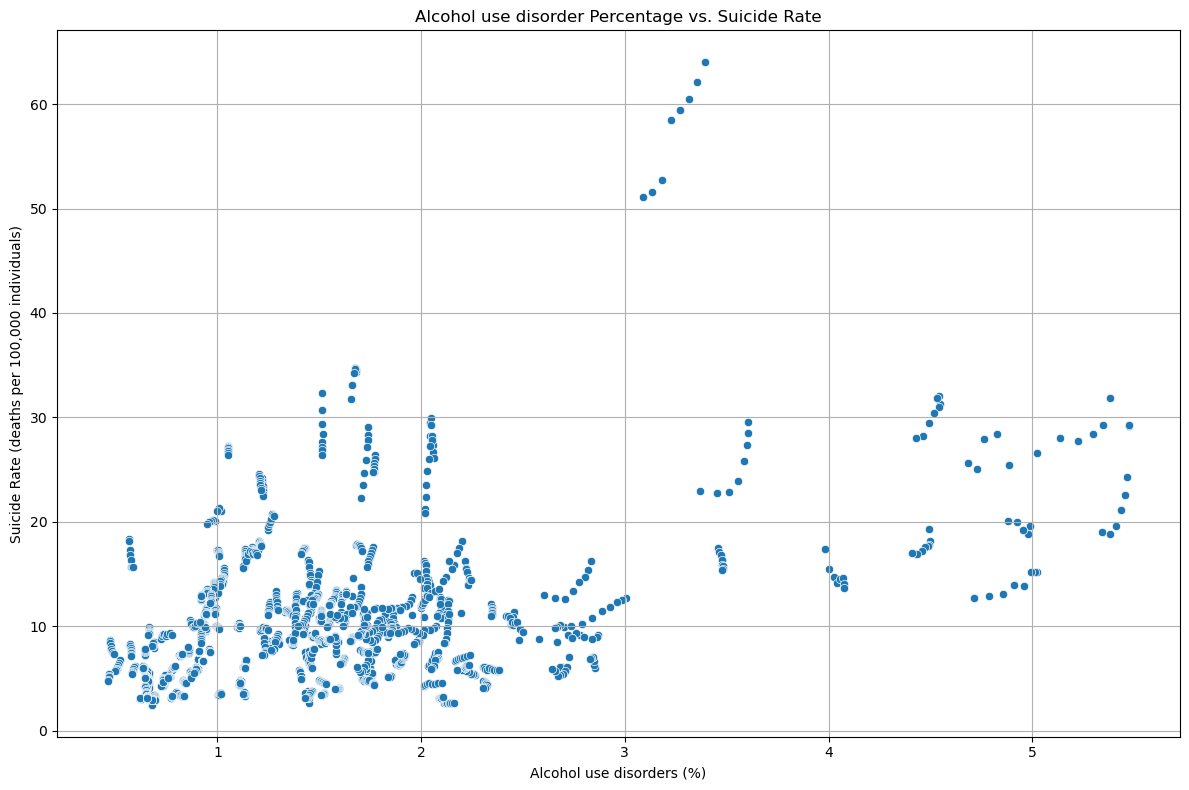

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df_cleaned, x='Alcohol use disorders (%)', y='Suicide rate (deaths per 100,000 individuals)')
plt.title('Alcohol use disorder Percentage vs. Suicide Rate')
plt.xlabel('Alcohol use disorders (%)')
plt.ylabel('Suicide Rate (deaths per 100,000 individuals)')
plt.grid(True)
plt.tight_layout()
plt.show()



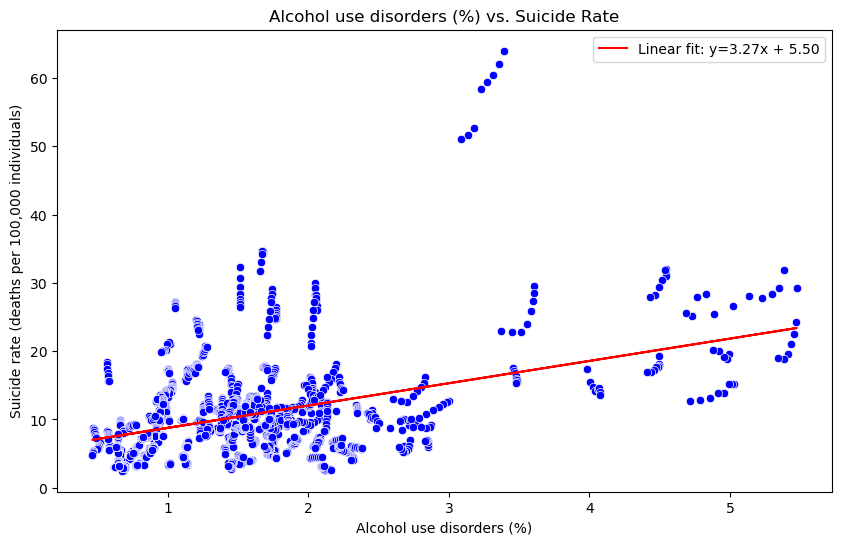

In [20]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Alcohol use disorders (%)', y='Suicide rate (deaths per 100,000 individuals)', data=merged_df_cleaned, color='blue')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df_cleaned['Alcohol use disorders (%)'], merged_df_cleaned['Suicide rate (deaths per 100,000 individuals)'])

# Plot the regression line
plt.plot(merged_df_cleaned['Alcohol use disorders (%)'], slope * merged_df_cleaned['Alcohol use disorders (%)'] + intercept, color='red', label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

# Labels and title
plt.xlabel('Alcohol use disorders (%)')
plt.ylabel('Suicide rate (deaths per 100,000 individuals)')
plt.title('Alcohol use disorders (%) vs. Suicide Rate')
plt.legend()

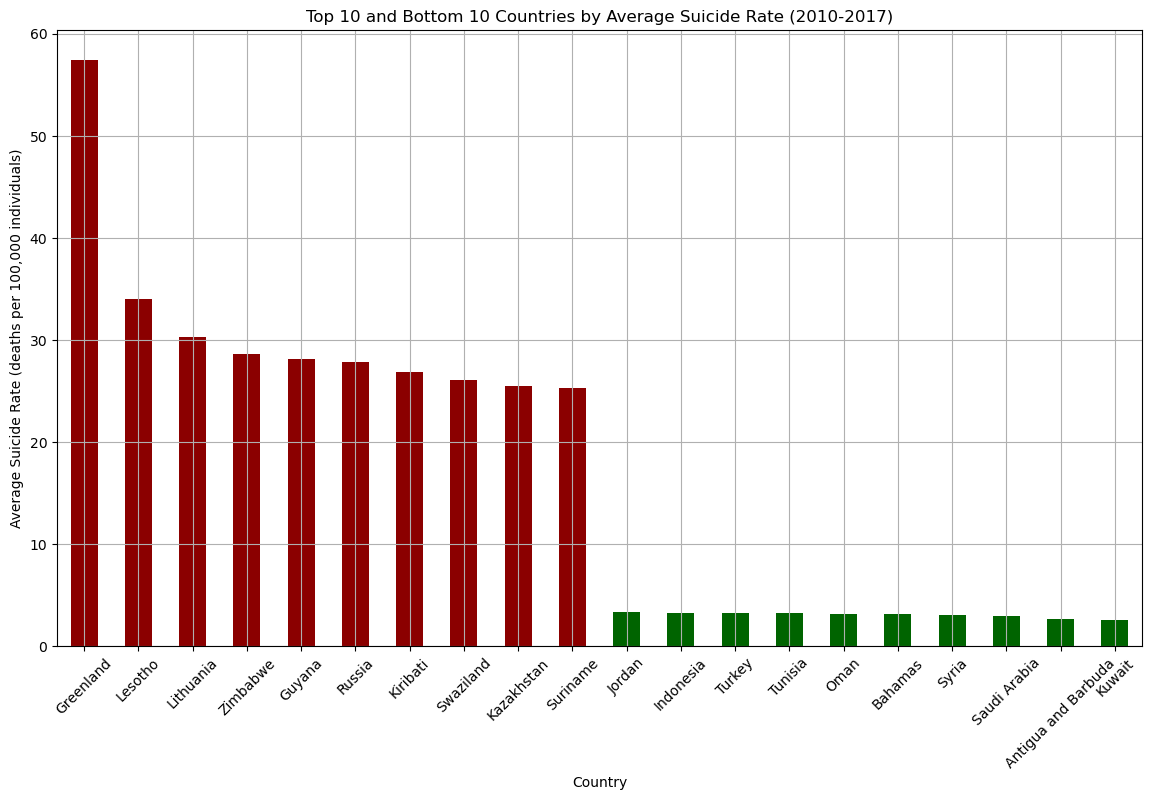

In [21]:
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean().sort_values(ascending=False)

# Get the top 10 and bottom 10 countries
top_10_countries = avg_suicide_rate.head(10)
bottom_10_countries = avg_suicide_rate.tail(10)

# Combine the top and bottom 10 into a single DataFrame
combined = pd.concat([top_10_countries, bottom_10_countries])

# Plotting
plt.figure(figsize=(14, 8))
combined.plot(kind='bar', color=['darkred']*10 + ['darkgreen']*10)
plt.xlabel('Country')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.title('Top 10 and Bottom 10 Countries by Average Suicide Rate (2010-2017)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

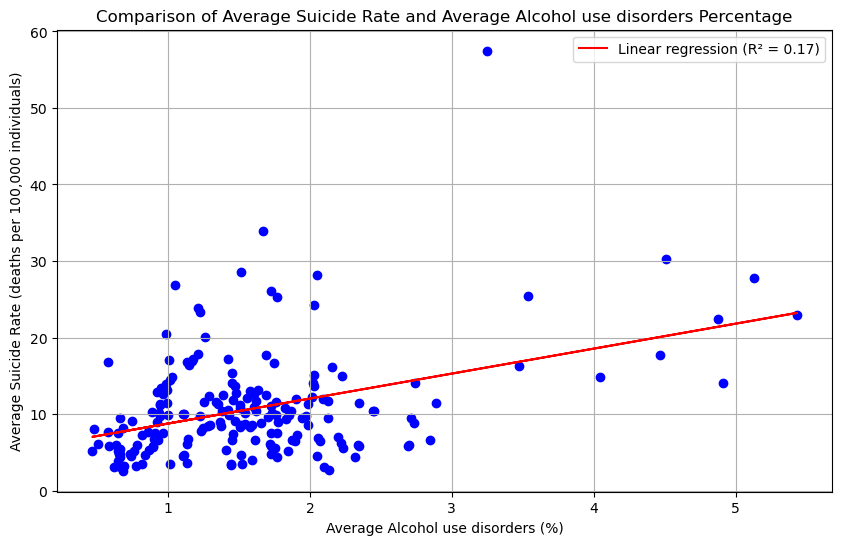

In [22]:
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_depression = merged_df_cleaned.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these into a single DataFrame
comparison_df = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Average Alcohol use disorders (%)': avg_depression
})

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Average Alcohol use disorders (%)'], comparison_df['Average Suicide Rate'], color='blue')

# Add a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(comparison_df['Average Alcohol use disorders (%)'], comparison_df['Average Suicide Rate'])
plt.plot(comparison_df['Average Alcohol use disorders (%)'], intercept + slope * comparison_df['Average Alcohol use disorders (%)'], 'r', label=f'Linear regression (R² = {r_value**2:.2f})')

plt.xlabel('Average Alcohol use disorders (%)')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.title('Comparison of Average Suicide Rate and Average Alcohol use disorders Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#Since the regression line slopes upwards (positive slope), it suggests that countries with higher average alcohol use disorders
#  percentages 
#tend to have higher average suicide rates. The strength of this relationship can be observed from the R² value

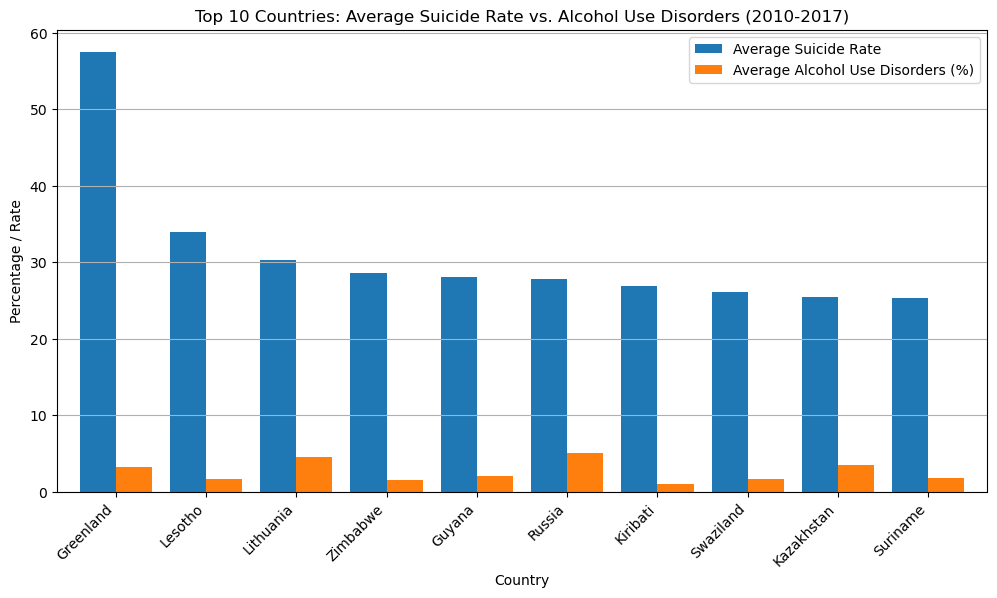

In [24]:
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_alcohol_use = merged_df_cleaned.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these into a single DataFrame
comparison_df2 = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Average Alcohol Use Disorders (%)': avg_alcohol_use
}).sort_values('Average Suicide Rate', ascending=False).head(10)  # Top 10 countries by suicide rate

# Plotting the data
comparison_df2.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Top 10 Countries: Average Suicide Rate vs. Alcohol Use Disorders (2010-2017)')
plt.xlabel('Country')
plt.ylabel('Percentage / Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()

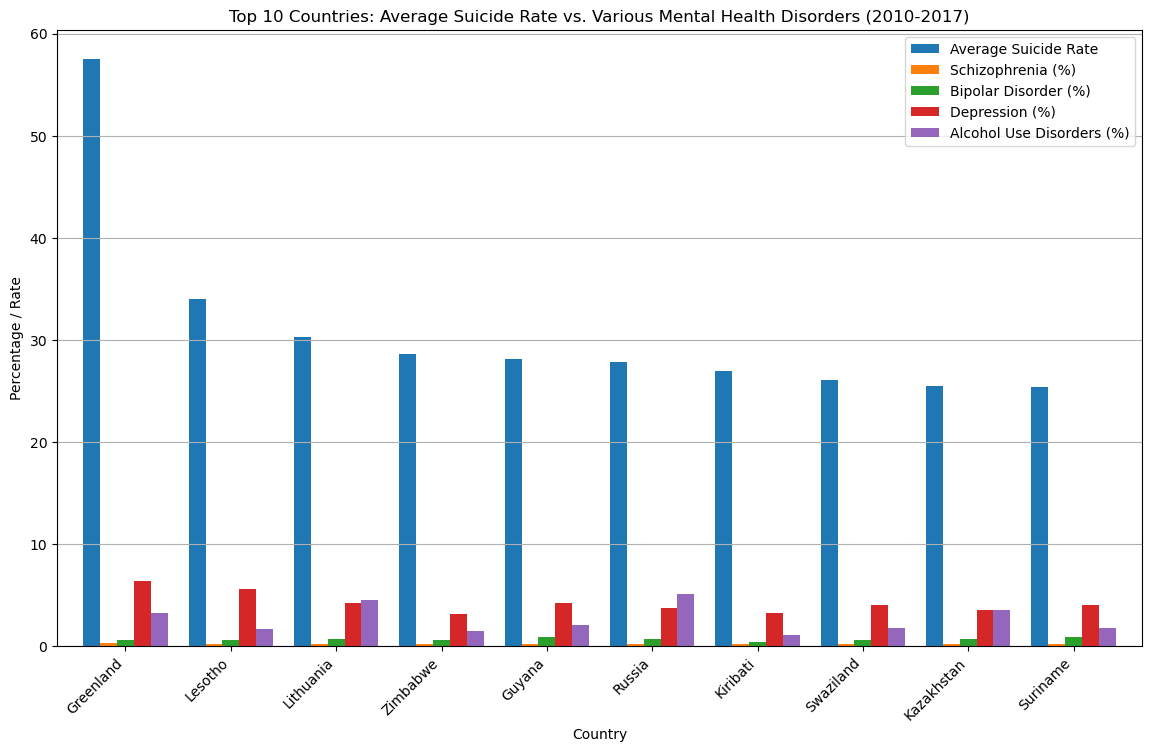

In [25]:


# Calculate the average values for suicide rate and various mental health disorders per country
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_schizophrenia = merged_df_cleaned.groupby('Entity')['Schizophrenia (%)'].mean()
avg_bipolar = merged_df_cleaned.groupby('Entity')['Bipolar disorder (%)'].mean()
avg_depression = merged_df_cleaned.groupby('Entity')['Depression (%)'].mean()
avg_alcohol_use = merged_df_cleaned.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these into a single DataFrame
comparison_df3 = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Schizophrenia (%)': avg_schizophrenia,
    'Bipolar Disorder (%)': avg_bipolar,
    'Depression (%)': avg_depression,
    'Alcohol Use Disorders (%)': avg_alcohol_use
}).sort_values('Average Suicide Rate', ascending=False).head(10)  # Top 10 countries by suicide rate

# Plotting the data
comparison_df3.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Top 10 Countries: Average Suicide Rate vs. Various Mental Health Disorders (2010-2017)')
plt.xlabel('Country')
plt.ylabel('Percentage / Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(axis='y')

plt.show()


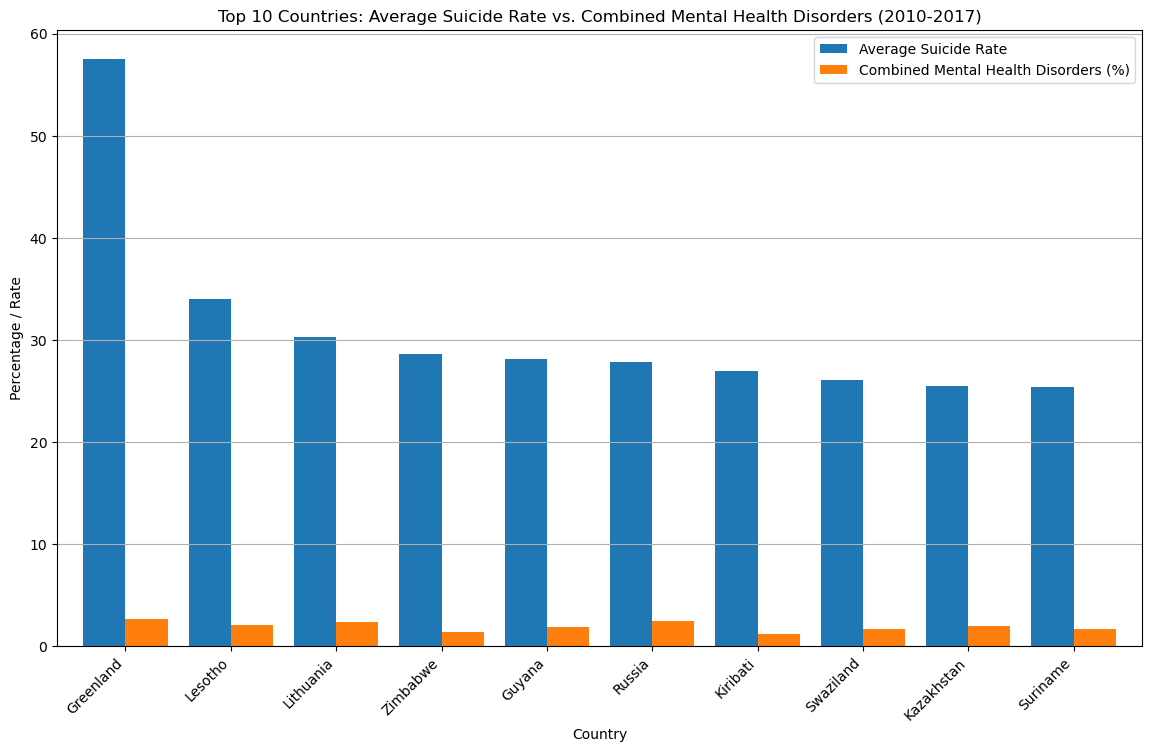

In [26]:
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_schizophrenia = merged_df_cleaned.groupby('Entity')['Schizophrenia (%)'].mean()
avg_bipolar = merged_df_cleaned.groupby('Entity')['Bipolar disorder (%)'].mean()
avg_depression = merged_df_cleaned.groupby('Entity')['Depression (%)'].mean()
avg_alcohol_use = merged_df_cleaned.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these averages into a single metric
combined_mental_health = (
    avg_schizophrenia + avg_bipolar + avg_depression + avg_alcohol_use
) / 4  # Averaging all mental health disorders

# Combine these into a new DataFrame for comparison
combined_metrics_df = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Combined Mental Health Disorders (%)': combined_mental_health
}).sort_values('Average Suicide Rate', ascending=False).head(10)  # Top 10 countries by suicide rate

# Plotting the data
combined_metrics_df.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Top 10 Countries: Average Suicide Rate vs. Combined Mental Health Disorders (2010-2017)')
plt.xlabel('Country')
plt.ylabel('Percentage / Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()

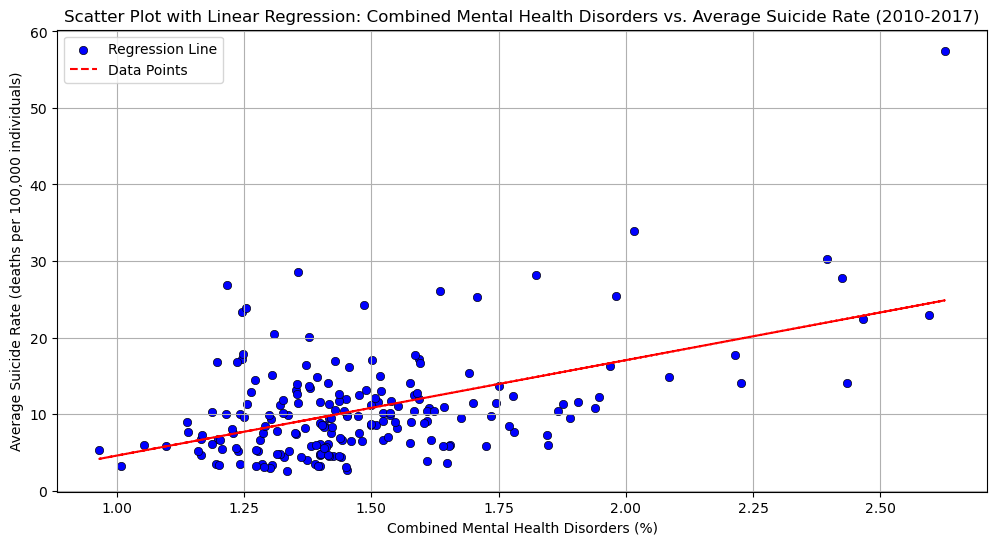

Slope: 12.467787932912355
Intercept: -7.8867293663410685
R-squared: 0.258053733760986
P-value: 2.9620859886805535e-14
Standard Error: 1.517817986121761


In [27]:
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_schizophrenia = merged_df_cleaned.groupby('Entity')['Schizophrenia (%)'].mean()
avg_bipolar = merged_df_cleaned.groupby('Entity')['Bipolar disorder (%)'].mean()
avg_depression = merged_df_cleaned.groupby('Entity')['Depression (%)'].mean()
avg_alcohol_use = merged_df_cleaned.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these averages into a single metric
combined_mental_health = (
    avg_schizophrenia + avg_bipolar + avg_depression + avg_alcohol_use
) / 4  # Averaging all mental health disorders

# Create a new DataFrame for scatter plot
scatter_df = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Combined Mental Health Disorders (%)': combined_mental_health
}).dropna()  # Drop any rows with NaN values

# Scatter plot with linear regression
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Combined Mental Health Disorders (%)', y='Average Suicide Rate', data=scatter_df, color='blue', edgecolor='black')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(scatter_df['Combined Mental Health Disorders (%)'], scatter_df['Average Suicide Rate'])
regression_line = slope * scatter_df['Combined Mental Health Disorders (%)'] + intercept

# Plot the regression line
plt.plot(scatter_df['Combined Mental Health Disorders (%)'], regression_line, color='red', linestyle='--')

# Adding titles and labels
plt.title('Scatter Plot with Linear Regression: Combined Mental Health Disorders vs. Average Suicide Rate (2010-2017)')
plt.xlabel('Combined Mental Health Disorders (%)')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.grid(True)
plt.legend(['Regression Line', 'Data Points'])

plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")